<a href="https://colab.research.google.com/github/khaulanauman/PlusW_IT_Training/blob/main/assignment_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**: Basic Operations with 1D and 2D NumPy Arrays

In [1]:
import numpy as np

# Global variables
arr_1d = np.array([1, 2, 3, 4, 5])
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

def array_operations():
    print("1D Array:", arr_1d)
    print("2D Array:\n", arr_2d)
    print("Sum of 1D Array:", np.sum(arr_1d))
    print("Mean of 2D Array:", np.mean(arr_2d))
    print("Transpose of 2D Array:\n", arr_2d.T)

# Call the function
array_operations()


1D Array: [1 2 3 4 5]
2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum of 1D Array: 15
Mean of 2D Array: 5.0
Transpose of 2D Array:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


**Question 2**: Image Processing with NumPy (Indexing & Slicing in Action)

In [2]:
import numpy as np

def process_image():
    image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)
    print("Original Image:\n", image)

    cropped = image[1:4, 1:4]
    print("Cropped Section:\n", cropped)

    inverted_image = 255 - image
    print("Inverted Image:\n", inverted_image)

# Call the function
process_image()


Original Image:
 [[245 195 252 229 179]
 [215 253  77 225 181]
 [151  88  91 121 254]
 [  5  75  64  98 147]
 [251   7  34  35 101]]
Cropped Section:
 [[253  77 225]
 [ 88  91 121]
 [ 75  64  98]]
Inverted Image:
 [[ 10  60   3  26  76]
 [ 40   2 178  30  74]
 [104 167 164 134   1]
 [250 180 191 157 108]
 [  4 248 221 220 154]]


**Question 3**: Augmented Reality Transformation – Perform linear algebra operations like scaling, rotation, and translation.

Original Image:


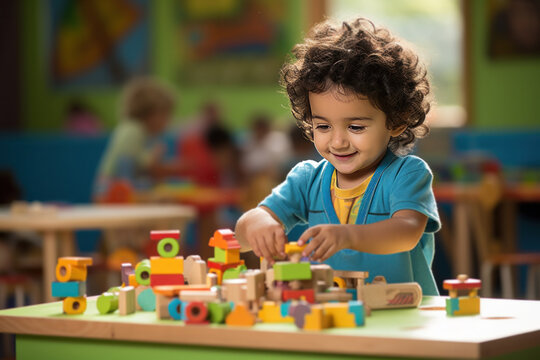

Scaled Image:


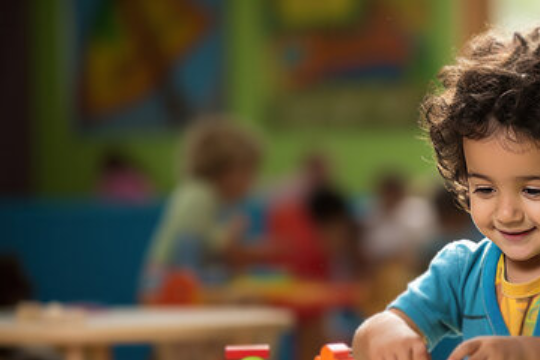

Rotated Image:


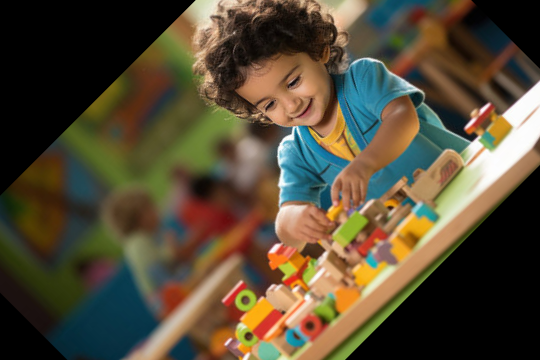

Translated Image:


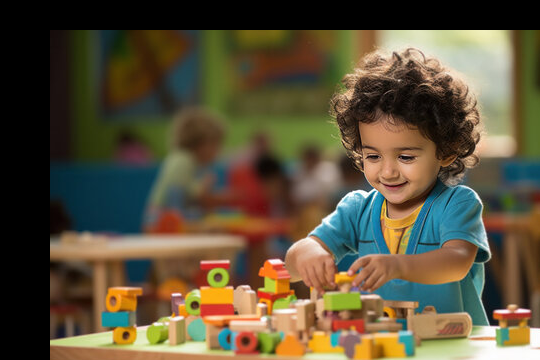

In [10]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the uploaded image (replace 'image.jpg' with your uploaded file name if needed)
image = cv2.imread('image.jpg')  # Ensure the image name matches the uploaded file

# Scaling Transformation
def scale_image(image, scale_factor):
    scaling_matrix = np.array([[scale_factor, 0, 0],
                               [0, scale_factor, 0],
                               [0, 0, 1]], dtype=np.float32)  # FIX: float type
    rows, cols = image.shape[:2]
    scaled_image = cv2.warpPerspective(image, scaling_matrix, (cols, rows))
    return scaled_image

# Rotation Transformation
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

# Translation Transformation
def translate_image(image, tx, ty):
    translation_matrix = np.array([[1, 0, tx],
                                   [0, 1, ty],
                                   [0, 0, 1]], dtype=np.float32)  # FIX: float type
    rows, cols = image.shape[:2]
    translated_image = cv2.warpPerspective(image, translation_matrix, (cols, rows))
    return translated_image

# Apply transformations
scaled_image = scale_image(image, 1.5)         # Scale 1.5x
rotated_image = rotate_image(image, 45)       # Rotate by 45 degrees
translated_image = translate_image(image, 50, 30)  # Translate by 50px right, 30px down

# Display results
print("Original Image:")
cv2_imshow(image)

print("Scaled Image:")
cv2_imshow(scaled_image)

print("Rotated Image:")
cv2_imshow(rotated_image)

print("Translated Image:")
cv2_imshow(translated_image)


**Question 4*: Face Detection from Image Arrays – Extract facial features by slicing a NumPy-based image array.

Detected Face Region:


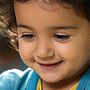

Image with Rectangles on Faces and Eyes:


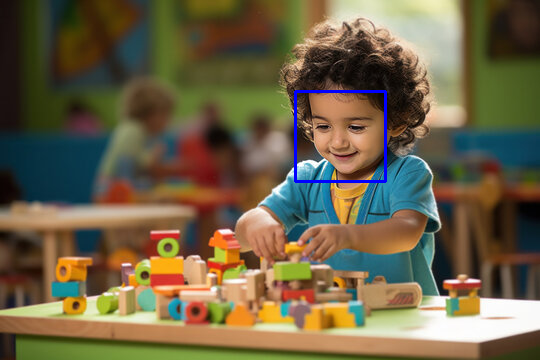

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the uploaded image
image = cv2.imread('image.jpg')  # Replace with your image name
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Detect faces
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5)

# Loop through detected faces
for (x, y, w, h) in faces:
    face_region = image[y:y+h, x:x+w]

    print("Detected Face Region:")
    cv2_imshow(face_region)  # ✅ Fixed: Show face region in Colab

    # Detect eyes in the face region
    face_gray = image_gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(face_gray, scaleFactor=1.1, minNeighbors=5)

    # Draw rectangle around face
cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Draw rectangle around eyes
for (ex, ey, ew, eh) in eyes:
    cv2.rectangle(face_region, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# Show final image with rectangles
print("Image with Rectangles on Faces and Eyes:")
cv2_imshow(image)

